 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [67]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [68]:
whale_data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\whale_returns.csv")

In [69]:
# Reading whale returns
whale_df = pd.read_csv(whale_data)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [70]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [71]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
# Drop nulls
whale_df.dropna(inplace=True)
# Sort Ascending
whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [72]:
# Reading algorithmic returns
Algo_Data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\algo_returns.csv")
Algo_df = pd.read_csv(Algo_Data)
# Sort Ascending
Algo_df.sort_index(ascending=True)
Algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [73]:
# Count nulls
Algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [74]:
Algo_df.set_index(pd.to_datetime(Algo_df['Date'], infer_datetime_format=True), inplace=True)
Algo_df.drop(columns=['Date'], inplace=True)
# Drop nulls
Algo_df.dropna(inplace=True)
Algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [75]:
# Reading S&P TSX 60 Closing Prices
SP_TSX60_Data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\sp_tsx_history.csv")
SP_TSX60_df = pd.read_csv(SP_TSX60_Data)
# Sort Ascending
SP_TSX60_df.sort_index(ascending=True)
SP_TSX60_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [76]:
# Check Data Types
SP_TSX60_df.dtypes

Date     object
Close    object
dtype: object

In [77]:
# Fix Data Types
SP_TSX60_df.set_index(pd.to_datetime(SP_TSX60_df['Date'], infer_datetime_format=True), inplace=True)
SP_TSX60_df.drop(columns=['Date'], inplace=True)

SP_TSX60_df["Close"] = SP_TSX60_df["Close"].str.replace('$', '')
SP_TSX60_df["Close"] = SP_TSX60_df["Close"].str.replace(',', '')
SP_TSX60_df["Close"] = SP_TSX60_df.astype(float)
SP_TSX60_df.dtypes

Close    float64
dtype: object

In [78]:
# Calculate Daily Returns
SP_TSX60_pct_change = SP_TSX60_df.pct_change()
SP_TSX60_pct_change.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [79]:
# Drop nulls
SP_TSX60_df.dropna(inplace=True)
SP_TSX60_pct_change.dropna(inplace=True)

In [80]:
# Rename `Close` Column to be specific to this portfolio.
SP_TSX60_df.columns = ['S&P TSX 60']
SP_TSX60_pct_change.columns = ['S&P TSX 60']
SP_TSX60_pct_change.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [81]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
Returns_df = pd.concat([SP_TSX60_pct_change, Algo_df, whale_df], axis="columns", join="inner")
Returns_df.head()
Returns_df.dtypes

S&P TSX 60                     float64
Algo 1                         float64
Algo 2                         float64
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

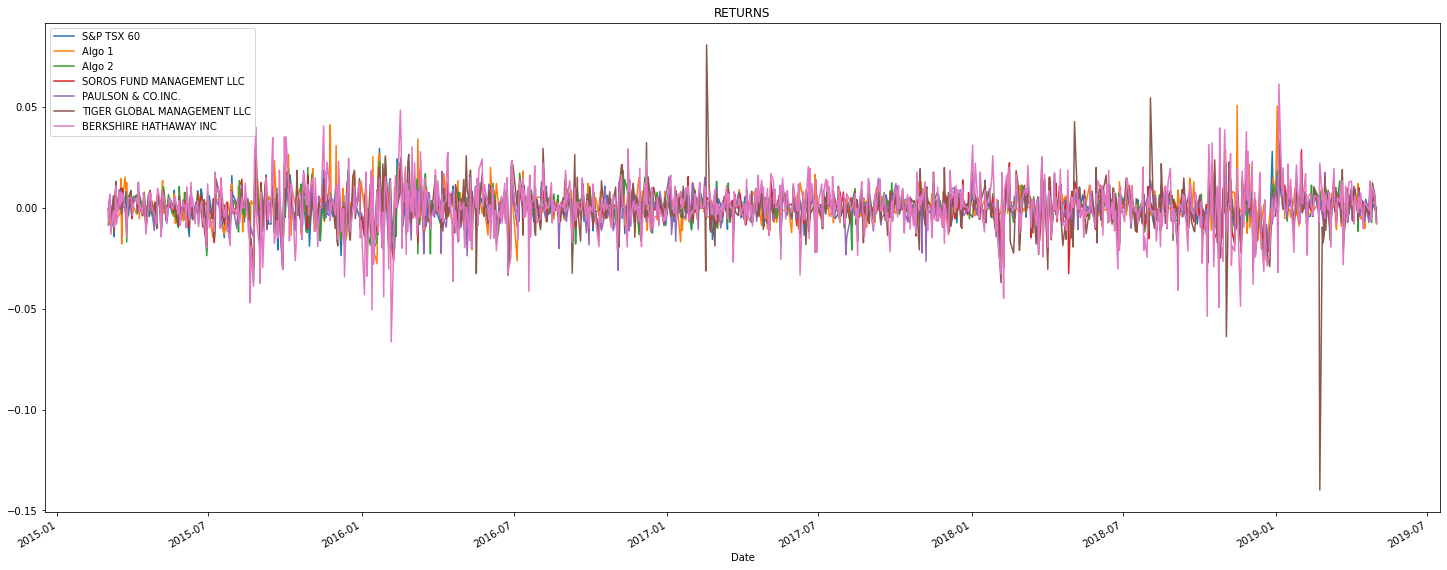

In [82]:
# Plot daily returns of all portfolios
ax = Returns_df.plot(figsize=(25,10), title ="RETURNS").legend(loc=2,prop={'size': 10})



#### Calculate and Plot cumulative returns.

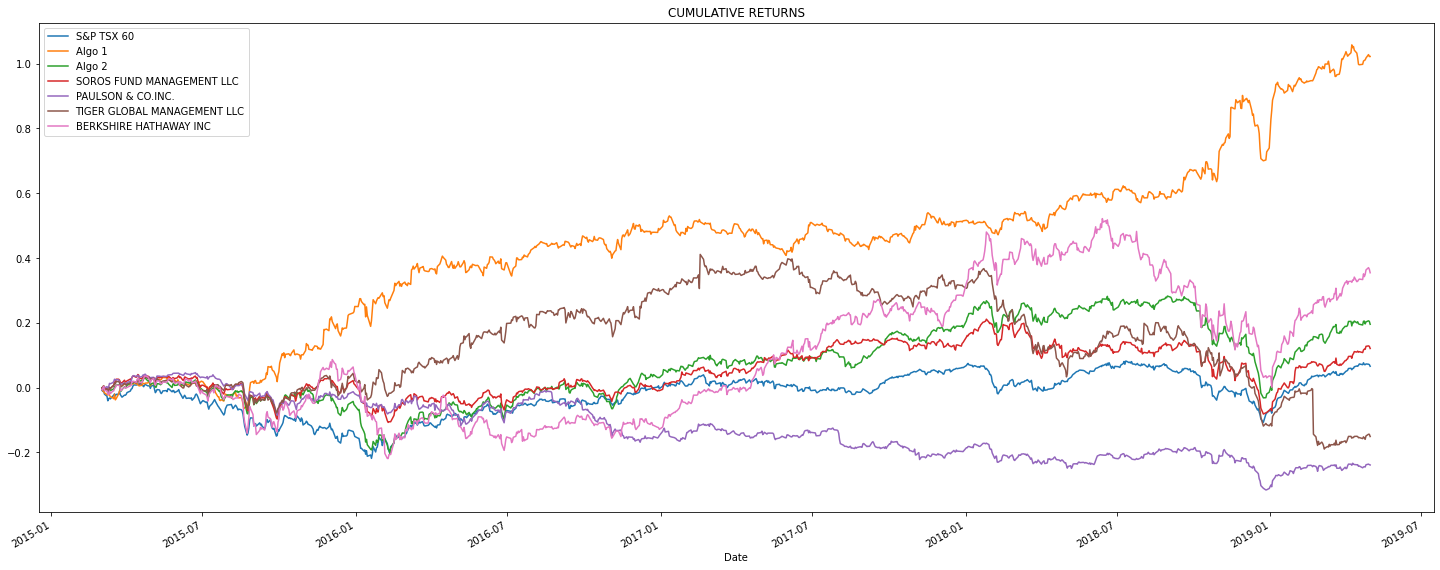

In [83]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + Returns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10), title ="CUMULATIVE RETURNS").legend(loc=2,prop={'size': 10})

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


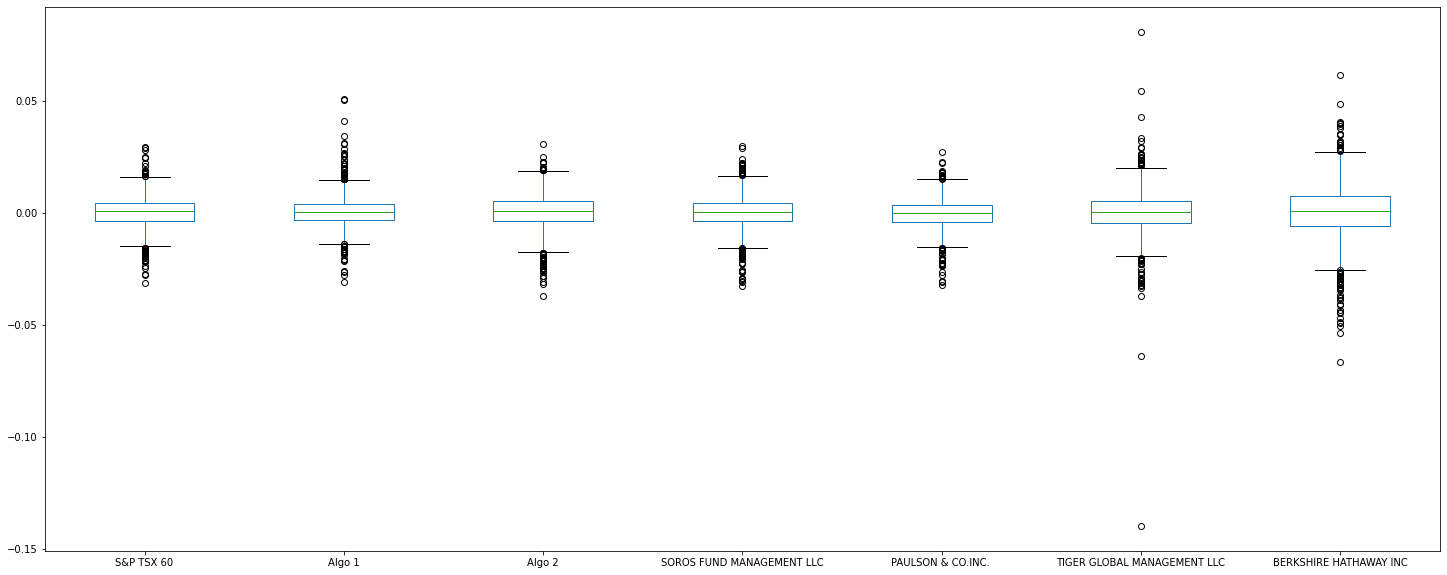

In [84]:
# Box plot to visually show risk
Returns_df.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [85]:
# Calculate the daily standard deviations of all portfolios
Returns_std = Returns_df.std()
Returns_std.head()

S&P TSX 60                   0.007034
Algo 1                       0.007589
Algo 2                       0.008326
SOROS FUND MANAGEMENT LLC    0.007828
PAULSON & CO.INC.            0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [86]:
# Calculate  the daily standard deviation of S&P TSX 60
## as seen above S&P TSX 60 std = 0.007034
# Determine which portfolios are riskier than the S&P TSX 60
## TIGER GLOBAL MANAGEMENT LLC (0.010883) , BERKSHIRE HATHAWAY INC (0.012826) Algo 1 (0.007589), Algo 2 (0.008326), SOROS FUND MANAGEMENT LLC (0.007828) all have higher std so have greater risk than S&P TSX 60 

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_std = Returns_std * np.sqrt(252)
Annualized_std

S&P TSX 60                     0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

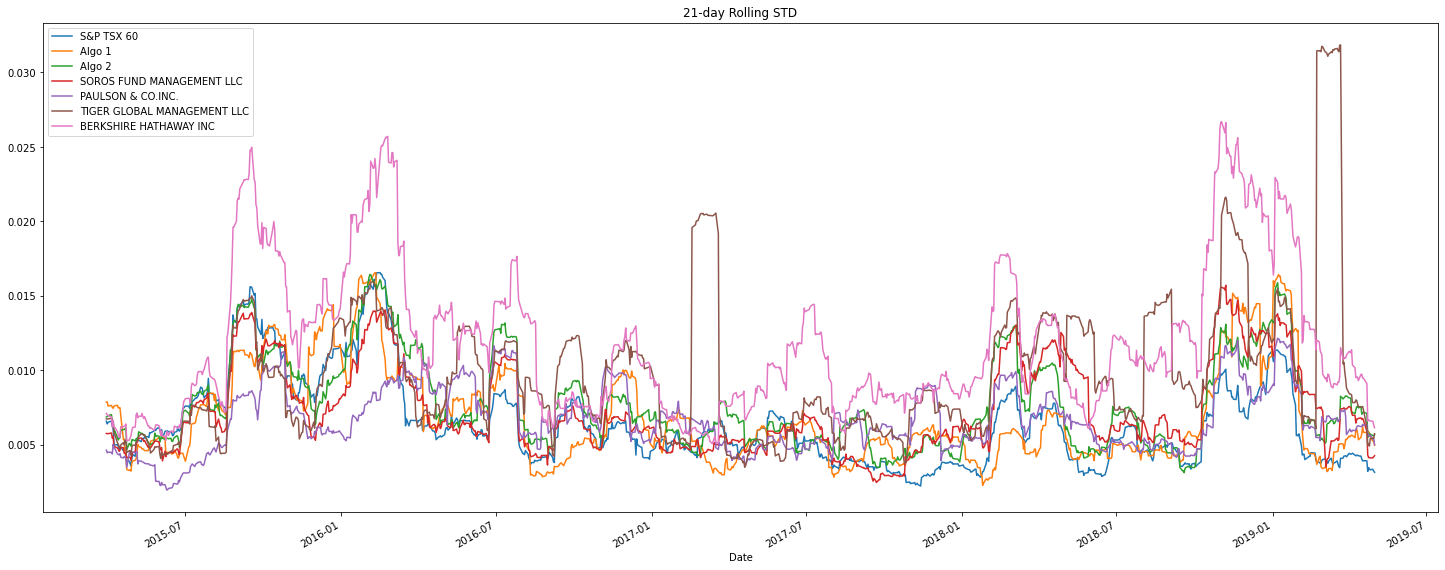

In [88]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Returns_std_21MA_df = Returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
Returns_std_21MA_df.plot(figsize=(25,10), title="21-day Rolling STD")

### Calculate and plot the correlation

In [89]:
# Calculate the correlation
Correlations = Returns_df.corr()
# Display de correlation matrix
Correlations

,S&P TSX 60,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P TSX 60,1.000000,0.310276,0.737370,0.673930,0.486511,0.440583,0.557250
Algo 1,0.310276,1.000000,0.285455,0.313795,0.266363,0.161236,0.289378
Algo 2,0.737370,0.285455,1.000000,0.826667,0.674015,0.506689,0.684609
SOROS FUND MANAGEMENT LLC,0.673930,0.313795,0.826667,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.486511,0.266363,0.674015,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.161236,0.506689,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.557250,0.289378,0.684609,0.750181,0.540033,0.423524,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

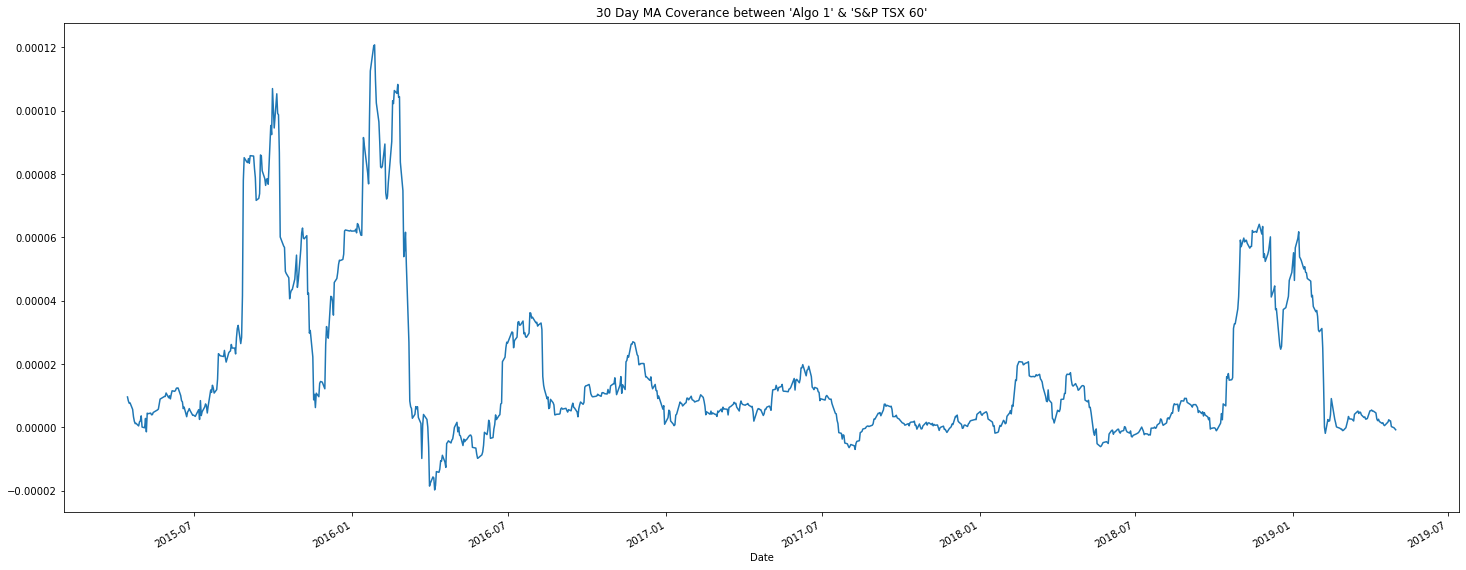

In [90]:
# Calculate covariance of a single portfolio (Algo 1) S&P 60 TSX
covariance = Returns_df['Algo 1'].cov(Returns_df['S&P TSX 60'])
# Calculate variance of S&P TSX
variance = Returns_df['Algo 1'].var()
# Computing beta
Algo_1_Beta = covariance / variance
# Plot beta trend
covariance_30MA = Returns_df['Algo 1'].rolling(window=30).cov(Returns_df['S&P TSX 60']).plot(figsize=(25,10),title= "30 Day MA Coverance between 'Algo 1' & 'S&P TSX 60'")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [127]:
# Use `ewm` to calculate the rolling window
Returns_df.ewm(halflife=21).mean()


,S&P TSX 60,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.005908,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089
2015-03-05,-0.003410,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603
2015-03-06,-0.005133,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256
2015-03-09,-0.005436,-0.004400,-0.000935,-0.000511,0.000673,-0.000616,-0.002128
...,...,...,...,...,...,...,...
2019-04-25,0.001018,0.000625,0.000876,0.001277,0.000032,-0.001058,0.001860
2019-04-26,0.001058,0.000702,0.001018,0.001500,0.000329,-0.000622,0.002138
2019-04-29,0.000998,0.000848,0.001077,0.001492,0.000406,-0.000399,0.002238


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
returns_sharpe_ratios = (Returns_df.mean() * 252) / (Returns_df.std() * np.sqrt(252))
returns_sharpe_ratios

S&P TSX 60                     0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

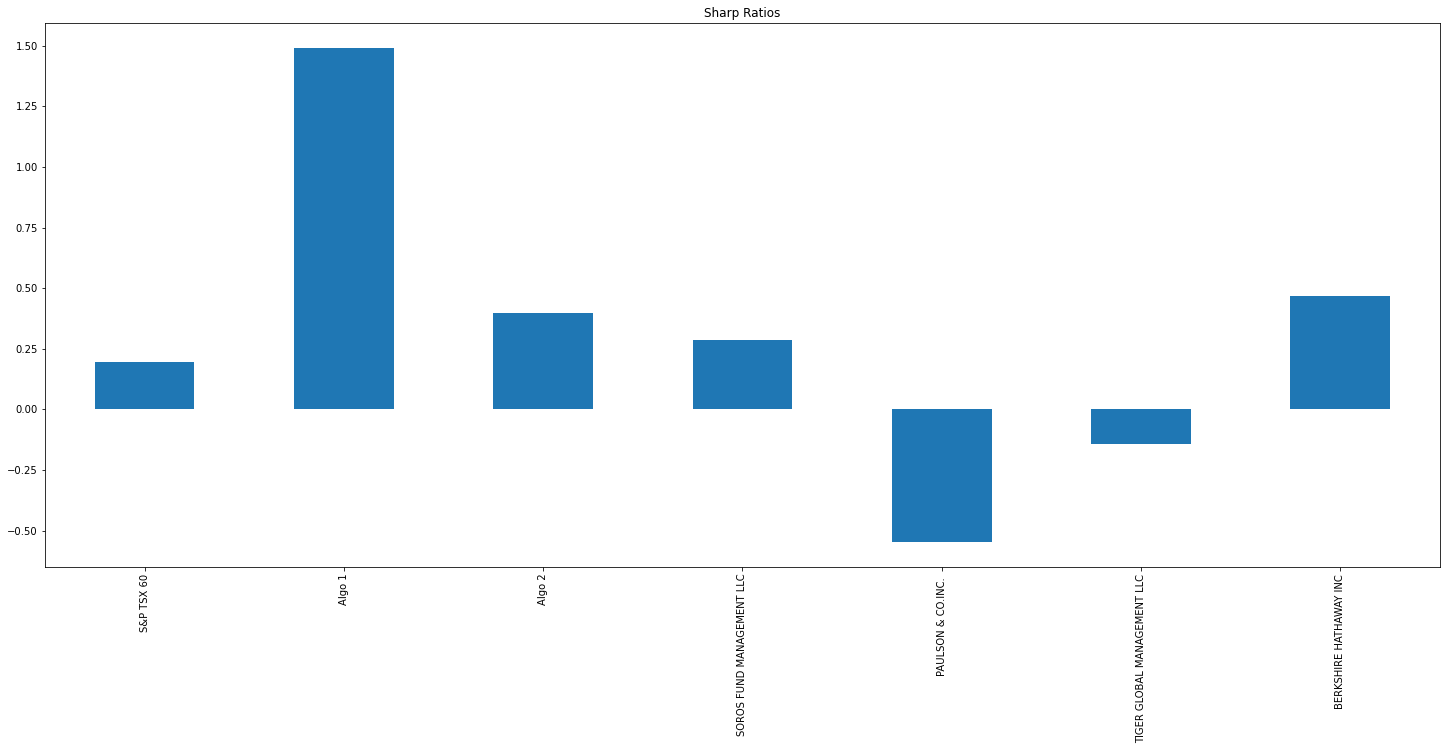

In [93]:
# Visualize the sharpe ratios as a bar plot
returns_sharpe_ratios.plot.bar(figsize=(25,10),title= "Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [94]:
# Reading data from 1st stock
SHOP_data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\shop_historical.csv")
SHOP_df = pd.read_csv(SHOP_data)
# Reset Date index
SHOP_df.set_index(pd.to_datetime(SHOP_df['Date'], infer_datetime_format=True), inplace=True)
SHOP_df.drop(columns=['Date'], inplace=True)
# Drop Symbol
SHOP_df.drop(columns='Symbol', inplace=True)
# Rename Columns
SHOP_df.columns = ["SHOP"]
# sort Index by Date
SHOP_df.sort_index(ascending=True)
SHOP_df.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [95]:
# Reading data from 2nd stock
OTEX_data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\otex_historical.csv")
OTEX_df = pd.read_csv(OTEX_data)
# Reset Date index
OTEX_df.set_index(pd.to_datetime(OTEX_df['Date'], infer_datetime_format=True), inplace=True)
OTEX_df.drop(columns=['Date'], inplace=True)
# Drop Symbol
OTEX_df.drop(columns=['Symbol'], inplace=True)
# Rename Columns
OTEX_df.columns = ["OTEX"]
# sort Index by Date
OTEX_df.sort_index(ascending=True)
OTEX_df.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [96]:
# Reading data from 3rd stock
L_data = Path(r"D:\monu\Homework\Week 3 and 4\Starter_Code\Resources\l_historical.csv")
L_df = pd.read_csv(L_data)
# Reset Date index
L_df.set_index(pd.to_datetime(L_df['Date'], infer_datetime_format=True), inplace=True)
L_df.drop(columns=['Date'], inplace=True)
# Drop Symbol
L_df.drop(columns=['Symbol'], inplace=True)
# Rename Columns
L_df.sort_index(ascending=True)
L_df.columns = ["L"]
L_df.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [97]:
# Combine all stocks in a single DataFrame
combine_df = pd.concat([L_df, OTEX_df, SHOP_df], axis="columns", join="inner")
combine_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [98]:
# Calculate daily returns
combine_returns = combine_df.pct_change()
# Drop NAs
combine_returns.dropna(inplace=True)
# Display sample data
combine_returns

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [99]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio = combine_df.dot(weights)
portfolio_returns = portfolio.pct_change()
# Display sample data
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
combine_returns["portfolio returns"] = portfolio_returns
combine_returns.dropna(inplace=True)
combine_returns.head(1000)

,L,OTEX,SHOP,portfolio returns
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.008561
2018-01-04,0.000174,-0.003715,0.017092,0.009167
2018-01-05,0.000000,-0.007924,-0.001455,-0.002271
2018-01-08,-0.009753,-0.009631,0.016392,0.005395
2018-01-09,0.008969,-0.000712,-0.011254,-0.004570
...,...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503,-0.001872
2019-12-23,-0.003240,-0.013463,-0.003118,-0.004079
2019-12-24,-0.000148,-0.007773,0.026915,0.020889


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized `std`
portfolio_annualized_std = portfolio_returns.std() * np.sqrt(252)
portfolio_annualized_std

0.3525007525501798

### Calculate and plot rolling `std` with 21-day window

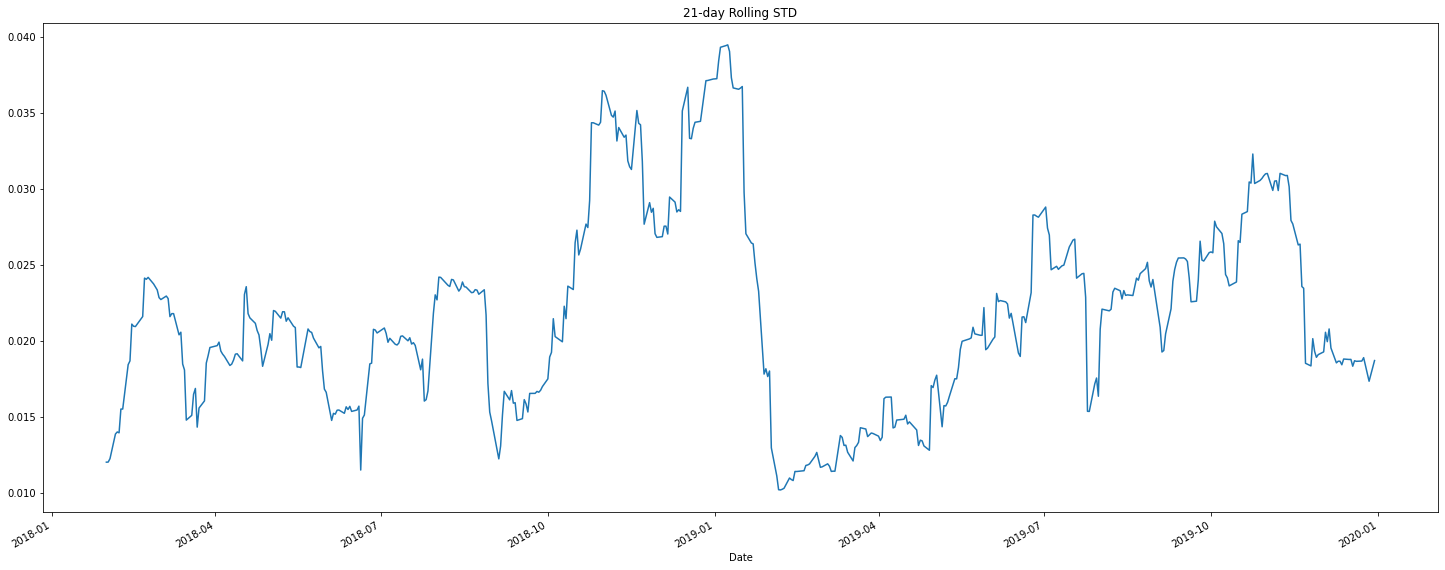

In [103]:
# Calculate rolling standard deviation
portfolio_21DMA_std = portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
portfolio_21DMA_std.plot(figsize=(25,10), title="21-day Rolling STD")

### Calculate and plot the correlation

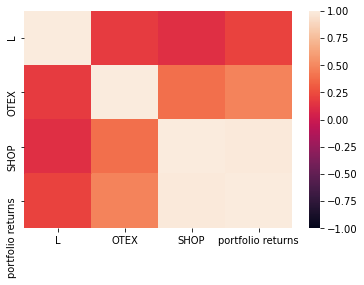

In [104]:
# Calculate and plot the correlation
Correlations_2 = combine_returns.corr()
sns.heatmap(Correlations_2, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

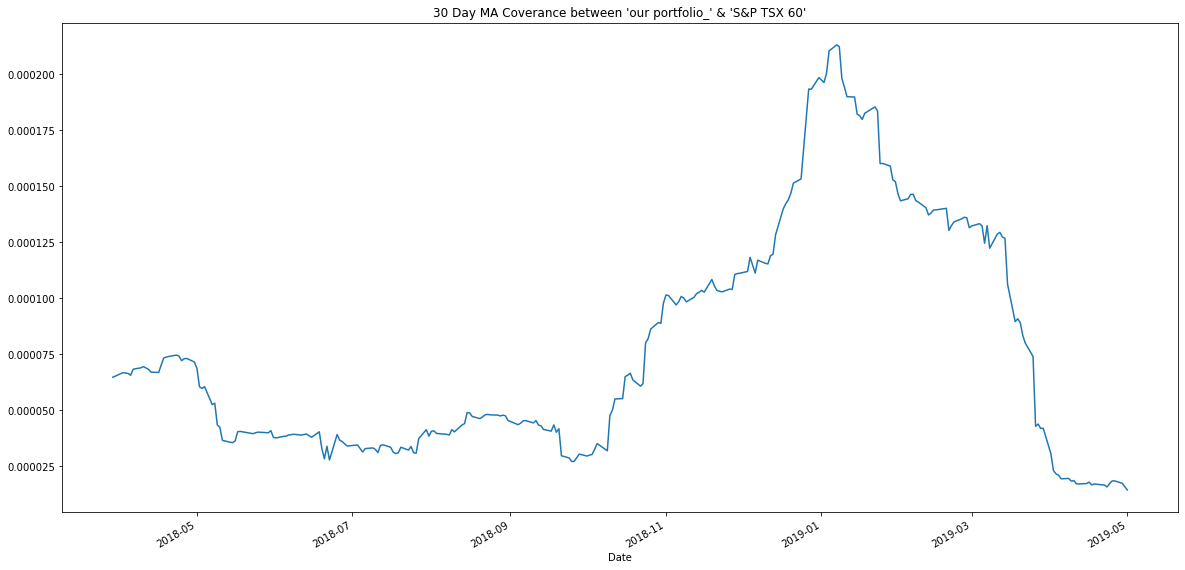

In [105]:
combine_returns['S&P TSX 60'] = Returns_df['S&P TSX 60']
combine_returns.dropna(inplace=True)
covariance_portfolio_SP = combine_returns["portfolio returns"].cov(combine_returns['S&P TSX 60'])
# Calculate variance of S&P TSX
variance_portfolio = combine_returns["portfolio returns"].var()
# Computing beta
portfolio_beta = covariance_portfolio_SP / variance_portfolio
# Plot beta trend
covariance_30MA = combine_returns["portfolio returns"].rolling(window=60).cov(combine_returns['S&P TSX 60'])#.plot(figsize=(25,10),title= "30 Day MA Coverance between 'our portfolio' & 'S&P TSX 60'")
covariance_30MA.plot(figsize=(20,10),title= "30 Day MA Coverance between 'our portfolio_' & 'S&P TSX 60'")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [106]:
# Calculate Annualzied Sharpe Ratios
portfolios_sharpe_ratio = (combine_returns.mean() * 252) / (combine_returns.std() * np.sqrt(252))
portfolios_sharpe_ratio

L                    0.532599
OTEX                 0.762776
SHOP                 1.575294
portfolio returns    1.546162
S&P TSX 60           0.034651
dtype: float64

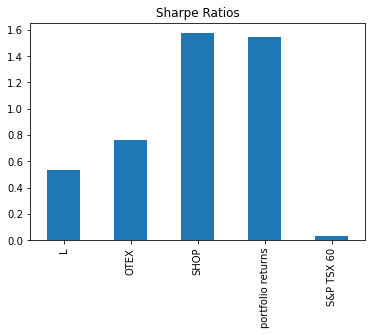

In [107]:
# Visualize the sharpe ratios as a bar plot
portfolios_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Based on sharp ratio theory, that describes how much extra return you recieve per unit of risk, our portfolio isn't that great as SHOP alone has seen to have a higher sharp ratio [ie. better return per unit of risk] and under this assumption is a better investment by itself.